<h1><b>Importing Libraries</b></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1><b>MetaData</b></h1>

<h1><b>Data Dictionary</b></h1>

<li>Variable : Definition	Key</li>


<li>survival : Survival 	0 = No, 1 = Yes</li>  
<li>pclass : Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd</li>     
<li>sex : Sex    male female</li>    
<li>Age : Age in years</li>    
<li>sibsp : # of siblings / spouses aboard the Titanic </li>    	 
<li>parch : # of parents / children aboard the Titanic </li>    
<li>ticket : Ticket number</li>  
<li>fare : Passenger fare</li>    
<li>cabin : Cabin number</li>      
<li>embarked : Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton</li>   

<div>

<h2><b>Variable Notes</b></h2>

<p> pclass: A proxy for socio-economic status (SES) Passenger class </p>

<li>1st = Upper</li>
<li>2nd = Middle</li>
<li>3rd = Lower</li>

<br>

<p>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</p>

<p>sibsp: The dataset defines family relations in this way...</p>
<p>Sibling = brother, sister, stepbrother, stepsister</p>
<p>Spouse = husband, wife (mistresses and fiancés were ignored)</p>

<p>parch: The dataset defines family relations in this way...</p>
<p>Parent = mother, father</p>
<p>Child = daughter, son, stepdaughter, stepson</p>

<p>Some children travelled only with a nanny, therefore parch=0 for them.</p>

</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h4><b>changing label values from 0 to died and 1 to survived</b></h4>

In [4]:
mapping = { 0: 'died', 1: 'Survived'}
data['Survived'] = data['Survived'].replace(mapping)

In [5]:
mapping = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data['Embarked'] = data['Embarked'].replace(mapping)

<h4><b>creating groups of ages</b></h4>

In [6]:
bins = pd.IntervalIndex.from_tuples([(17, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
Age = data['Age']
data['Age'] = pd.cut(Age, bins)
data['Age']

0      (17.0, 30.0]
1      (30.0, 40.0]
2      (17.0, 30.0]
3      (30.0, 40.0]
4      (30.0, 40.0]
           ...     
886    (17.0, 30.0]
887    (17.0, 30.0]
888             NaN
889    (17.0, 30.0]
890    (30.0, 40.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(17, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [7]:
data.describe()

,PassengerId,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.836071,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,8.000000,6.000000,512.329200


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
data.drop(columns= 'Cabin',inplace = True,axis = 1)

In [11]:
data.dropna(axis = 0,inplace = True)

In [12]:
data.shape

(599, 11)

<h4><b>displaying number of distinct values among all records in each field</b></h4>

In [13]:
def get_unique_counts(dataframe):
    unique_counts = dataframe.nunique()
    unique_counts_list = [(col, count) for col, count in unique_counts.items()]
    return unique_counts_list

get_unique_counts(data)

[('PassengerId', 599),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 599),
 ('Sex', 2),
 ('Age', 5),
 ('SibSp', 4),
 ('Parch', 7),
 ('Ticket', 508),
 ('Fare', 207),
 ('Embarked', 3)]

<h4><b>count number of passengers per port of embarkation</b></h4>

In [14]:
data['Embarked'].value_counts().to_frame()

,count
Embarked,
Southampton,472
Cherbourg,106
Queenstown,21


<h4><b>count number of passengers per each different class</b></h4>

In [15]:
data['Pclass'].value_counts().to_frame()

,count
Pclass,
3,277
1,172
2,150


<h4><b>changing pclass and embarked attributes type from object to category to use them with cross tables and pivot tables </b></h4>

In [16]:
data[['Pclass','Embarked']] = data[['Pclass','Embarked']].astype('category')

data[['Pclass','Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    599 non-null    category
 1   Embarked  599 non-null    category
dtypes: category(2)
memory usage: 6.1 KB


<h4><b> calculating proportions of survival among all passengers</b></h4>

In [17]:
pd.options.display.float_format = '{:.1f}%'.format
ed = data['Survived'].value_counts(normalize=True)*100
ed.to_frame()

,proportion
Survived,
died,62.1%
Survived,37.9%


<h4><b> calculating proportions of Port of Embarkation among all passengers</b></h4>

In [18]:
pd.options.display.float_format = '{:.1f}%'.format
ed1 = data['Embarked'].value_counts(normalize=True)*100
ed1.to_frame()

,proportion
Embarked,
Southampton,78.8%
Cherbourg,17.7%
Queenstown,3.5%


<h4><b> calculating proportions of survival among all passengers</b></h4>

In [19]:
ed2 = data['Pclass'].value_counts(normalize=True)*100
ed2.to_frame()

,proportion
Pclass,
3,46.2%
1,28.7%
2,25.0%


<h4><b> calculating proportions of survival among all passengers according to number of parent and children</b></h4>

In [20]:
pd.crosstab(data['Survived'],
            data['Parch'], normalize=True
            )*100

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
Survived,28.0%,5.7%,3.5%,0.5%,0.0%,0.2%,0.0%
died,53.3%,5.3%,1.8%,0.2%,0.7%,0.7%,0.2%


<h4><b> calculating proportions of survival among all passengers according to number of siblings/spouse</b></h4>

In [21]:
pd.crosstab(data['Survived'],
            data['SibSp'], normalize=True
            )*100

SibSp,0,1,2,3
Survived,,,,
Survived,24.2%,12.0%,1.0%,0.7%
died,46.9%,13.0%,2.0%,0.2%


<h4><b> calculating proportions of survival among all passengers per sex</b></h4>

In [22]:
pd.crosstab(data['Survived'],
            data['Sex'], normalize=True
            )*100

Sex,female,male
Survived,,
Survived,26.2%,11.7%
died,7.8%,54.3%


<h4><b> creating a heatmap of a previously created cross tab between pclass and survived fields</b></h4>

<Axes: xlabel='Pclass', ylabel='Survived'>

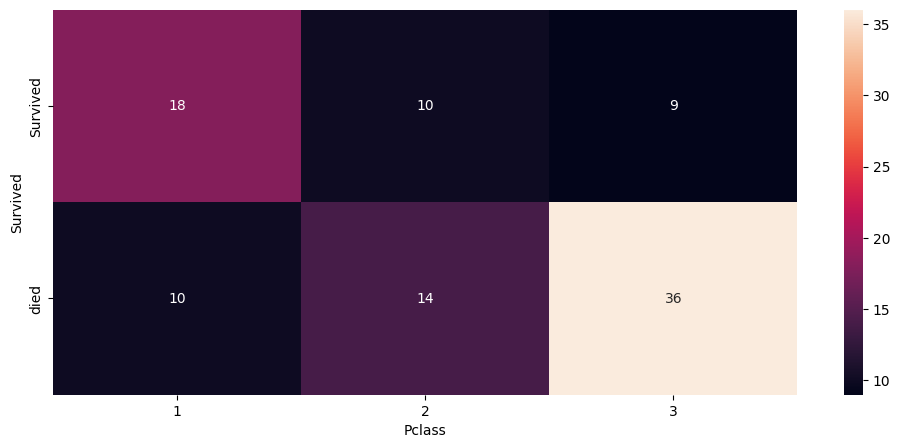

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(data['Survived'],
            data['Pclass'], normalize=True
            )*100).astype('int'), annot=True, fmt="d")

In [24]:
pd.crosstab(data['Survived'],
            data['Age'], normalize=True
            )*100

Age,"(17, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"
Survived,,,,,
Survived,17.5%,11.4%,5.5%,2.8%,0.7%
died,31.9%,14.4%,8.8%,4.2%,2.8%


In [25]:
data['Age'].value_counts().to_frame()

,count
Age,
"(17, 30]",296
"(30, 40]",154
"(40, 50]",86
"(50, 60]",42
"(60, 100]",21


In [26]:
pd.options.display.float_format = '{:.2f}'.format
data.pivot_table(index= "Age", columns = 'Pclass', values = 'Survived', aggfunc = "count")

Pclass,1,2,3
Age,,,
"(17, 30]",49,73,174
"(30, 40]",48,43,63
"(40, 50]",37,19,30
"(50, 60]",25,12,5
"(60, 100]",13,3,5


<h4><b> creating a pivot table that counts number of both survivals and death among groups of ages foreach passenger class</b></h4>

In [27]:
df_p = pd.pivot_table(data, values='PassengerId', index=['Pclass','Age'],
               columns=['Survived'], aggfunc="count", fill_value=0, margins=True, margins_name="Total")
df_p

Survived          Survived  died  Total
Pclass Age                             
1      (17, 30]         35    14     49
       (30, 40]         36    12     48
       (40, 50]         21    16     37
       (50, 60]         15    10     25
       (60, 100]         2    11     13
2      (17, 30]         30    43     73
       (30, 40]         19    24     43
       (40, 50]         10     9     19
       (50, 60]          2    10     12
       (60, 100]         1     2      3
3      (17, 30]         40   134    174
       (30, 40]         13    50     63
       (40, 50]          2    28     30
       (50, 60]          0     5      5
       (60, 100]         1     4      5
Total                  227   372    599

<h4><b> replacing the labels with their original numerical values to use them for calculating values used in the coming visuals </b></h4>

In [28]:
mapping = { 'died' : 0, 'Survived' : 1}
data['Survived'] = data['Survived'].replace(mapping)

C:\Users\yboyk\AppData\Local\Temp\ipykernel_4560\3329972433.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agesurvive = data.groupby(['Age'])['Survived'].mean().reset_index()


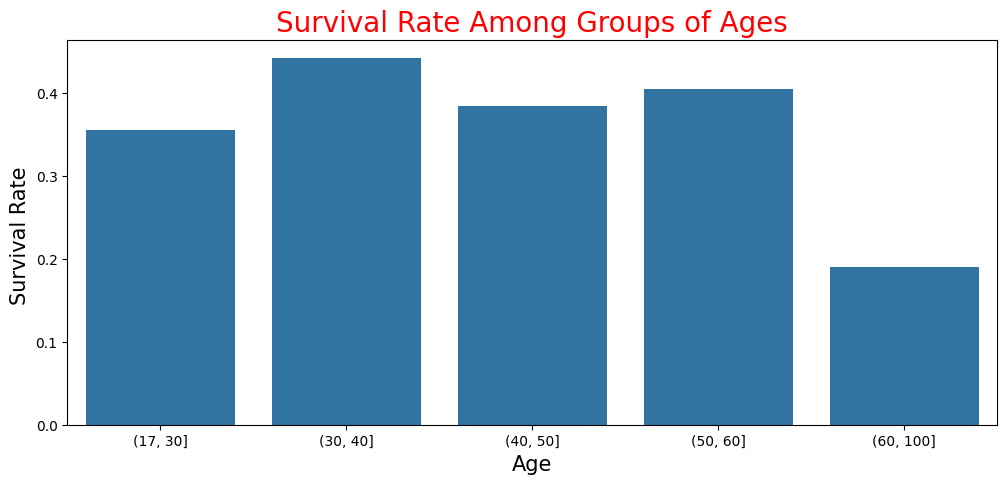

In [29]:
agesurvive = data.groupby(['Age'])['Survived'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = agesurvive[['Age','Survived']], x = "Age", y = "Survived")
plt.xlabel('Age', size = 15)
plt.ylabel('Survival Rate ', size = 15)
plt.title('Survival Rate Among Groups of Ages', color = 'red', size = 20)
plt.show()

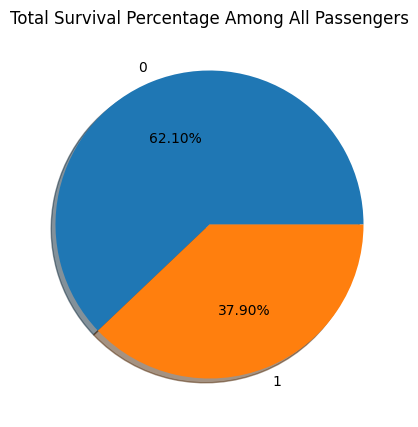

In [30]:
size = data['Survived'].value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.pie(size, shadow = True, autopct = "%.2f%%", labels=size.index)
plt.title('Total Survival Percentage Among All Passengers')
plt.show()

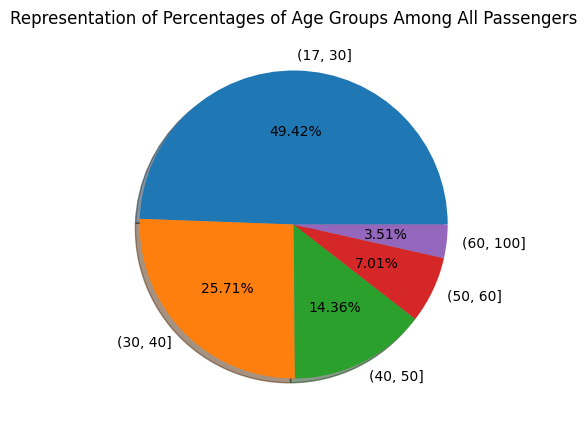

In [31]:
size = data['Age'].value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.pie(size, shadow = True, autopct = "%.2f%%", labels=size.index)
plt.title('Representation of Percentages of Age Groups Among All Passengers')
plt.show()

C:\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

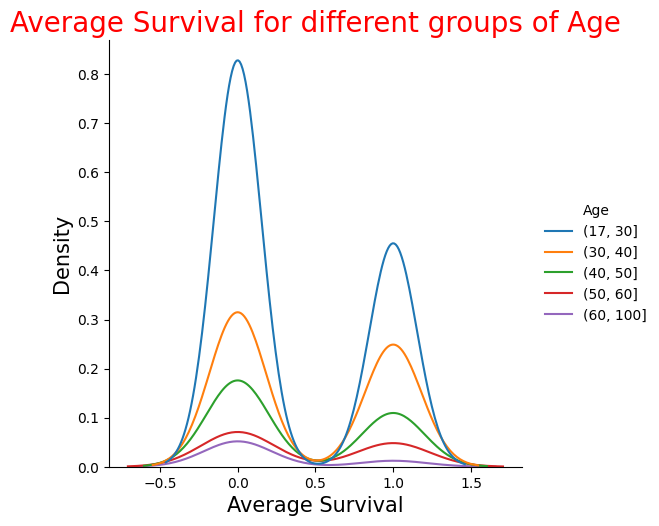

In [32]:
plt.figure(figsize=(12,5))
sns.displot(data=data.reset_index(),
            x = "Survived", hue='Age', kind='kde')

plt.xlabel('Average Survival', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Average Survival for different groups of Age', color = 'red', size = 20)
plt.show()


In [33]:
df_pie = df_p.reset_index()
df_pie.Total = df_pie.Total.fillna(0)

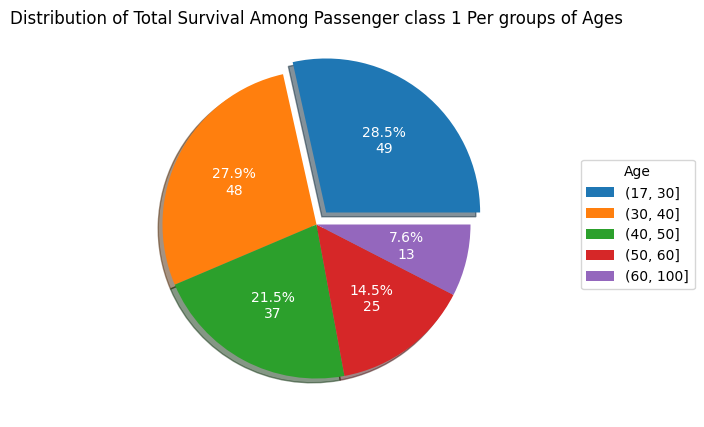

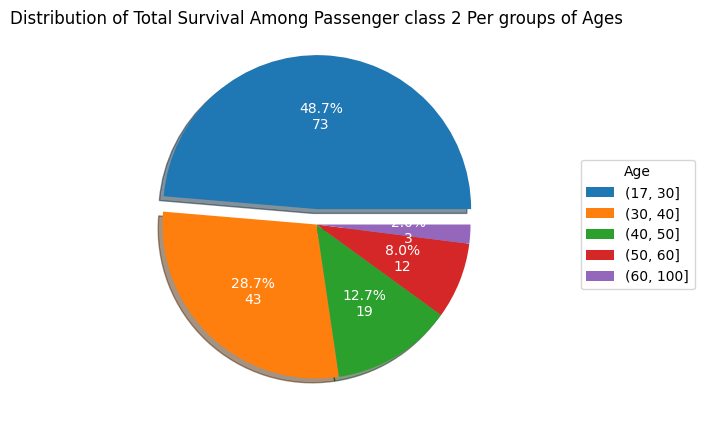

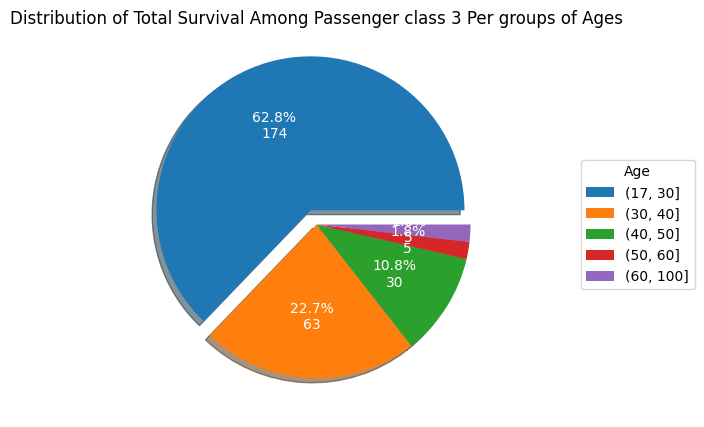

In [34]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)


for e in range(1, 4):
    plt.figure(figsize=(12,5))
    dt = df_pie[df_pie['Pclass']==e]
    exp = np.zeros(len(dt))
    exp[np.argmax(dt.Total)] = 0.1

    plt.pie(dt.Total, shadow = True,   explode=exp, 
            autopct=lambda pct: func(pct, dt.Total),
            textprops=dict(color="w"))

    plt.title('Distribution of Total Survival Among Passenger class ' + str(e)+ ' Per groups of Ages')
    plt.legend(dt.Age, title="Age",
          loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [35]:
!pip install nbconvert

DEPRECATION: Loading egg at c:\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
